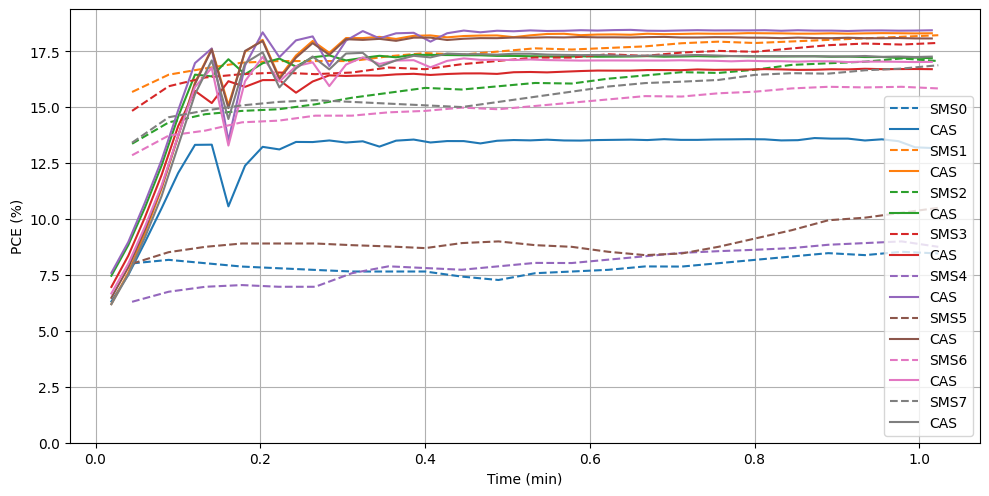

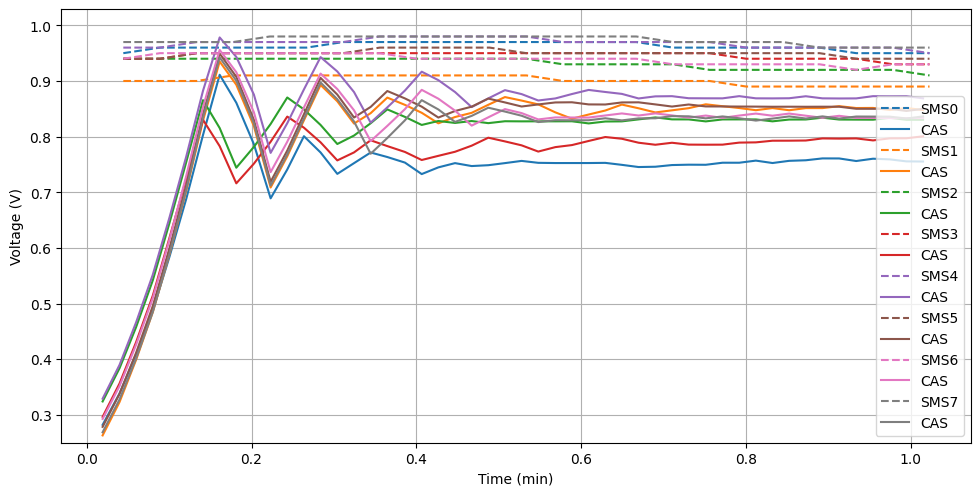

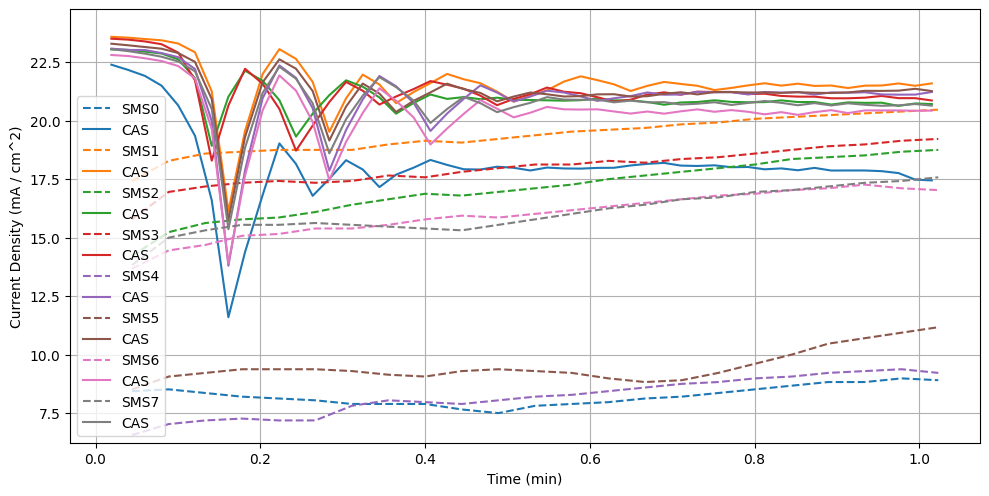

[ 7.94438477 17.7597168  16.43530273 17.36962891  8.36342773  9.15927734
 15.4230957  15.98261719]
[13.50060673 18.24848169 17.27185637 16.61600264 18.3897808  18.09725237
 17.06331327 17.28724979]


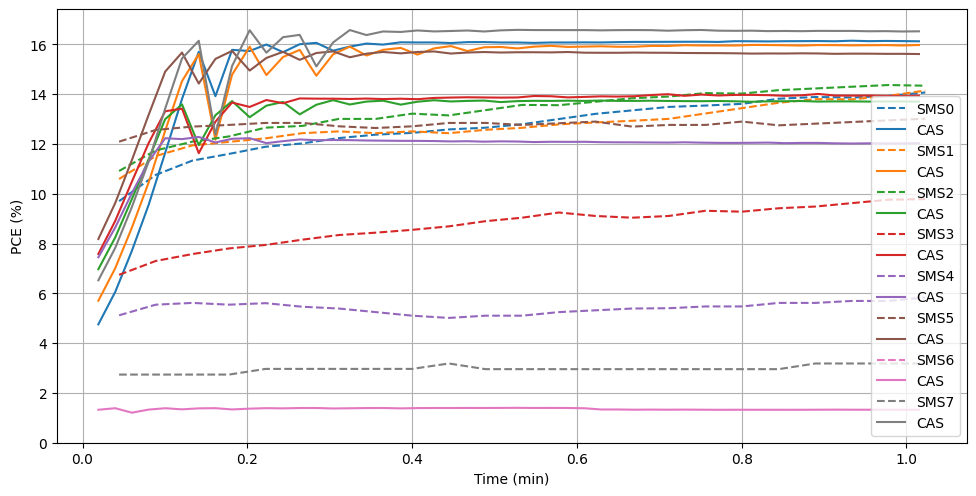

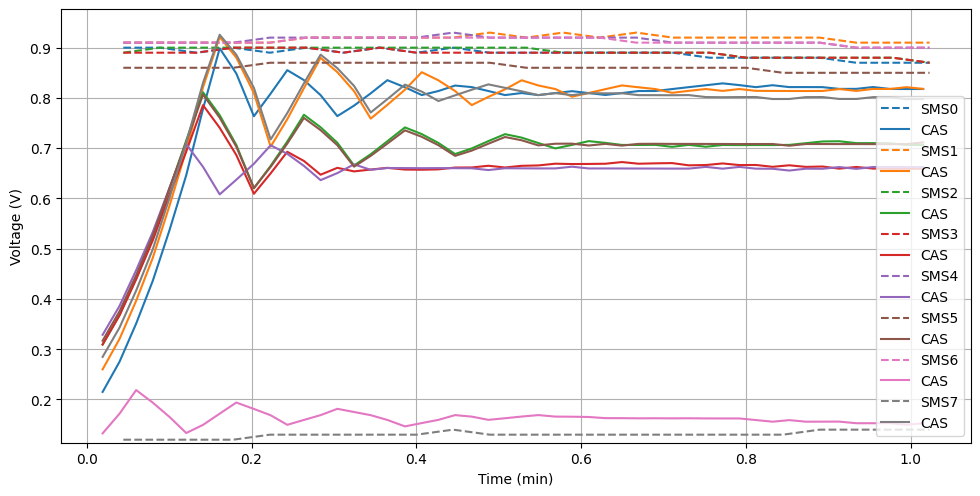

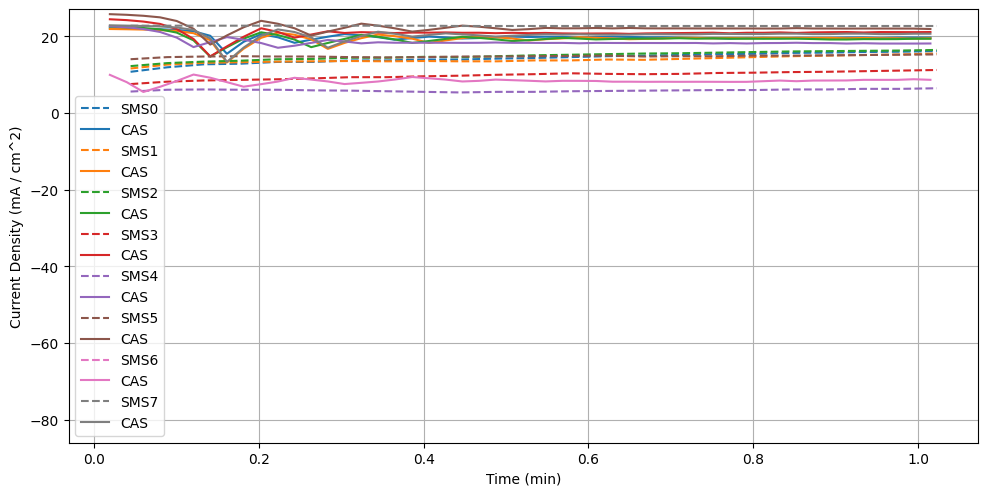

[13.28994141 13.13662109 13.79863281  9.17524414  5.39604492 12.81791992
  3.0277832 ]
[16.09801231 15.90247398 13.71664117 13.91384428 12.07075016 15.65632592
 16.54500406]


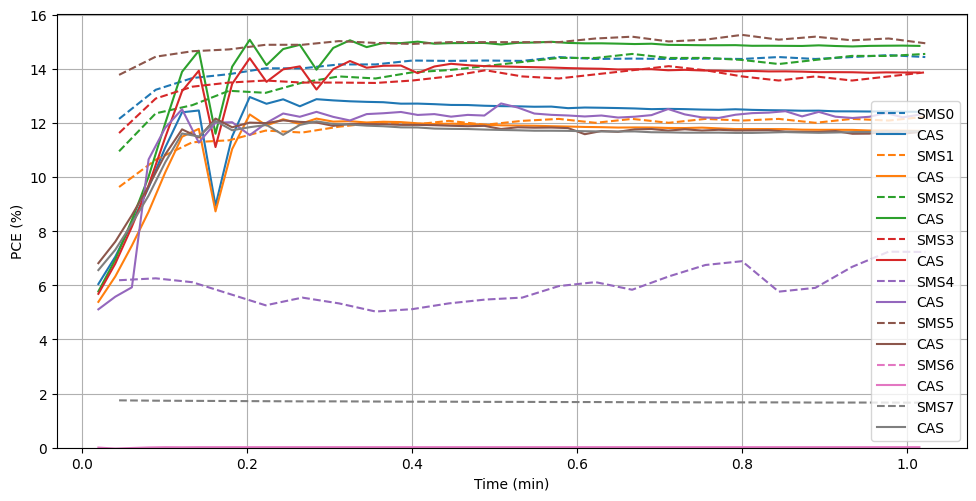

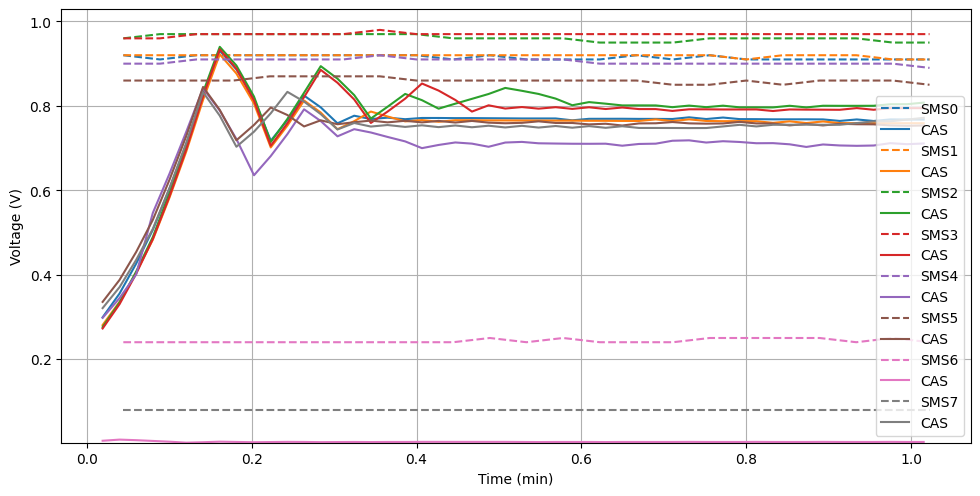

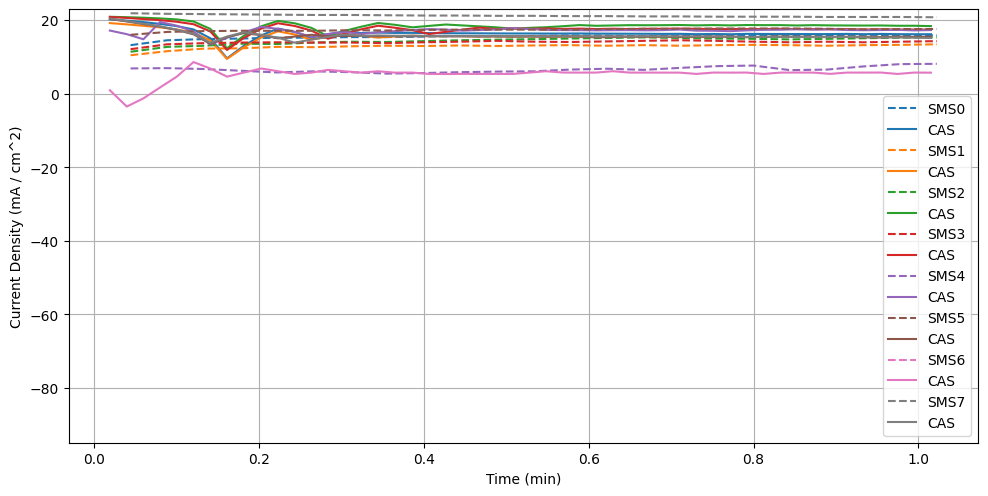

[14.36064453 12.07246094 14.26699219 13.74868164  6.07626953 15.05014648
  1.6828125 ]
[12.54822483 11.84336795 14.89888261 13.97562806 12.31626025 11.76050771
 11.70453126]


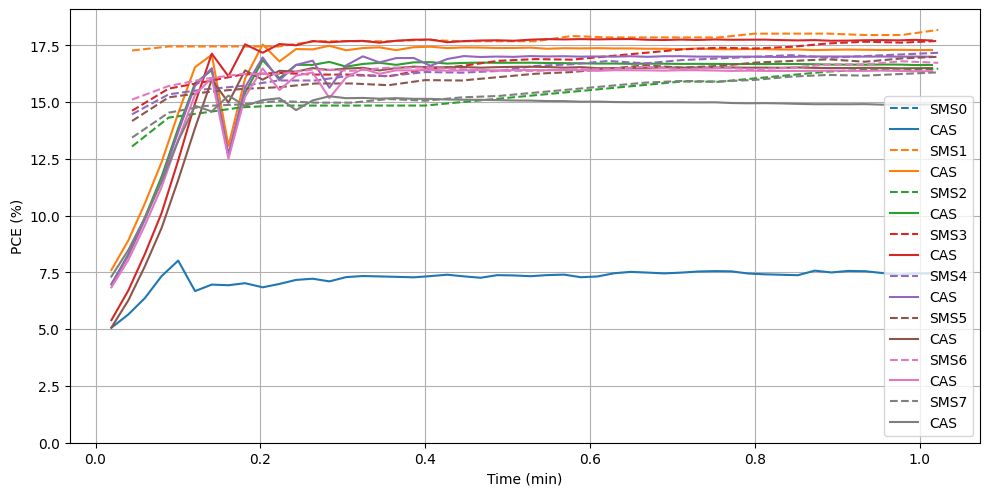

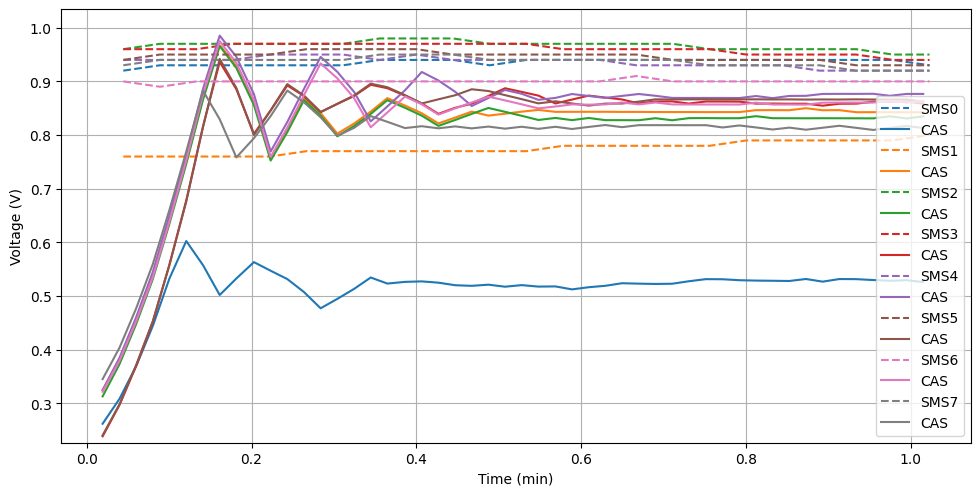

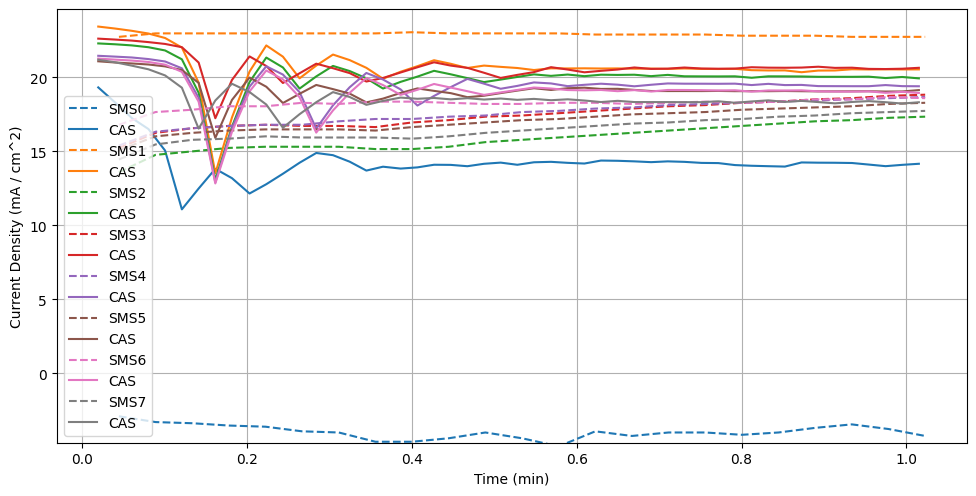

[17.87485352 15.73295898 17.13066406 16.75634766 16.48481445 16.53481445
 15.76005859]
[17.35435868 16.69589331 17.73666982 16.98513912 16.52049554 16.39150119
 15.01020685]
--- SMS ---
Min: 1.6828124999999998
Q1 : 9.175244140625
Med: 14.2669921875
Q3 : 16.435302734375
Max: 17.874853515625
Outliers: []

--- Litos Lite ---
Min: 11.704531255138786
Q1 : 13.716641167170494
Med: 16.09801231252183
Q3 : 17.06331326928125
Max: 18.38978080287592
Outliers: []



C:\Users\achen\AppData\Local\Temp\ipykernel_56916\686285729.py:303: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot, labels=labels)


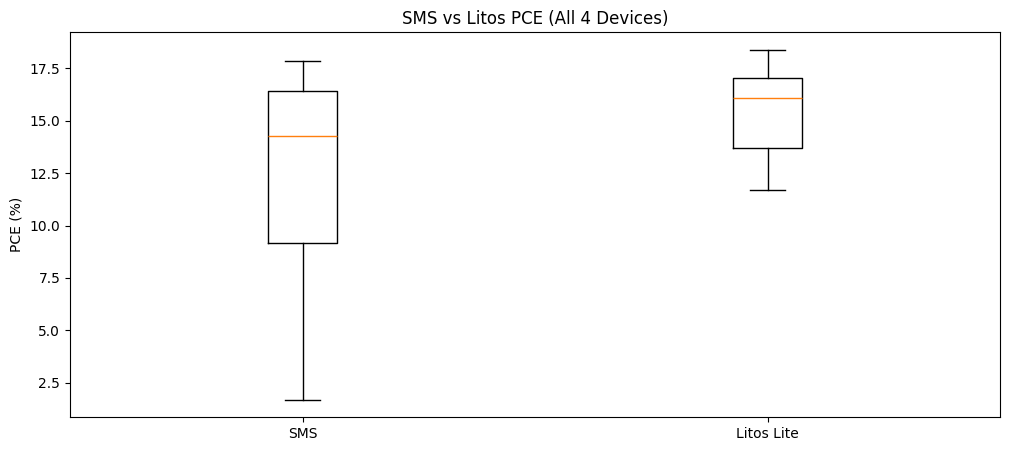

min diff: 0.48876488858525136 at idx: 1
Average PCE absolute difference: 3.6930431275150792
min diff: 0.08199164532950576 at idx: 2
Average PCE absolute difference: 4.774978240288472
min diff: 0.22694641756778644 at idx: 3
Average PCE absolute difference: 3.2073853979745266
min diff: 0.03568108893589894 at idx: 4
Average PCE absolute difference: 0.46386749552235607
total_diff 3.0575159640213148


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
from matplotlib.font_manager import FontProperties
import os
import sys
import re
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.cbook import boxplot_stats

def plot_difference(litos_directory = "", ss_file_path = "", plot_range = [], time_limit = -1, plot_size = (12,10)):
	# litos_directory = ""
	# litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\2025-03-04-- Litos New PCB 4 Device comparison\devices\device_2"
	all_files = []

	if litos_directory != "":
		for root, dirs, files in os.walk(litos_directory):
			for file in files:
				if file.endswith('.csv'):
					file_path = os.path.join(root, file)
					all_files.append(file_path)

	litos_pce = []
	litos_V = []
	litos_mA = []
	litos_time = []

	# Process each file
	for file_path in all_files:
		if "_2_0" in file_path:
			try:
				data = np.genfromtxt(
					file_path,
					delimiter=',',
					comments='#',
					skip_header=0,
					encoding='cp1252'  # Specify the correct encoding
				)
				pce = ((data[:, 1] * (data[:, 2]/1000)) / (0.1*0.128))*100
				# data_with_pce= np.column_stack((data, pce))
				litos_V.append(data[:, 1])
				litos_mA.append(data[:, 2]/0.128)
				litos_time.append(data[:,0])
				litos_pce.append(pce)
			except Exception as e:
				print(f"Error processing {file_path}: {e}")
	# pce = []
	# for file_path in all_files:
	# 	if "_2_0" in file_path:
	# 		try:
	# 			with open(file_path, 'r', encoding='cp1252') as f:
	# 				all_lines = f.readlines()

	# 			comment_lines = [line.strip() for line in all_lines if "PCE" in line.lstrip()]
	# 			pce.append([float(re.search(r'([\d\.]+)', s).group(1)) for s in comment_lines if re.search(r'([\d\.]+)', s)][0])

	# 		except Exception as e:
	# 			print(f"Error processing {file_path}: {e}")

	litos_pce = np.array(litos_pce[::-1])
	litos_time = np.array(litos_time[::-1])
	litos_mA = np.array(litos_mA[::-1])
	litos_V = np.array(litos_V[::-1])
	litos_time = litos_time/60
	if litos_directory:
		max_time = np.max(litos_time[0])
		if max_time > time_limit and time_limit > 0:
			end_idx = np.searchsorted(litos_time[0,:], time_limit)

			litos_time = litos_time[:, :end_idx]
			litos_pce = litos_pce[:, :end_idx]
			litos_mA = litos_mA[:, :end_idx]
			litos_V = litos_V[:, :end_idx]
	else:
		litos_mA = [0]
		litos_V = [0]
		litos_pce = [0]


	data = []
	mA = []
	v = []
	# ss_file_path = ""
	# ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\Mar-04-2025 16_42_19__4 Device First Test\Mar-04-2025_16-44-53__4 Device First Test__ID2__mppt.csv"
	if ss_file_path != "":
		arr = np.loadtxt(ss_file_path, delimiter=",", dtype=str)
		header_row = np.where(arr == "Time")[0][0]

		meta_data = {}
		for data in arr[:header_row, :2]:
			meta_data[data[0]] = data[1]

		headers = arr[header_row, :]
		arr = arr[header_row + 1 :, :]

		header_dict = {value: index for index, value in enumerate(headers)}
		time = np.array(arr[:, header_dict["Time"]]).astype("float")
		time /= 60

		pixel_V = arr[:, 1::2][:, 0:8].astype(float)
		pixel_mA = arr[:, 2::2][:, 0:8].astype(float)

		cell_area = float(meta_data["Cell Area (mm^2)"])
		mA = pixel_mA/cell_area
		v = pixel_V

		data = ((pixel_V*pixel_mA/1000) / (0.1*cell_area))*100

		# calculation in minutes
		max_time = time[-1]
		if max_time > time_limit and time_limit > 0:
			end_idx = np.searchsorted(time, time_limit)

			time = time[:end_idx]
			data = data[:end_idx,:]
			mA = mA[:end_idx,:]
			v = pixel_V[:end_idx,:]

	time_label = "Time (min)"
	if max(time) > 60:
		time /= 60
		litos_time /= 60
		time_label = "Time (hr)"

	plt.figure(figsize=plot_size)
	bottom = min(np.min(litos_pce), np.min(data))*0.95
	top = max(np.max(litos_pce), np.max(data))*1.05

	plt.ylim(bottom = 0, top = top)
	plt.xlabel(time_label)
	plt.grid()
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

	plt.ylabel('PCE (%)')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)

	average_litos = []
	average = []
	for i in plot_range:
		if ss_file_path:
			plt.plot(time,
					 data[:,i],
					 linestyle='--',
					 color=colors[i % len(colors)],
					 label = "SMS"+ str(i))
		if litos_directory:
			plt.plot(litos_time[i],
					 litos_pce[i],
					 color=colors[i % len(colors)],
					 label = "CAS")
		if ss_file_path and litos_directory:
			second_half = data[:,i][len(data[:,i]) // 3:]
			average_second_half = np.mean(second_half)

			second_half_litos = litos_pce[i][len(litos_pce[i]) // 3:]
			average_second_half_litos = np.mean(second_half_litos)
			if average_second_half > 0 and average_second_half_litos > 0:
				average.append(average_second_half)
				average_litos.append(average_second_half_litos)

	average = np.array(average)
	average_litos = np.array(average_litos)
	abs_diff = abs(average - average_litos)

	lines = plt.gca().get_lines()
	x_min, x_max = plt.xlim()
	num_lines = len(lines)
	# legend_anchor = (1, 0.2)
	# plt.legend(bbox_to_anchor=legend_anchor)
	plt.legend()
	plt.show()


	plt.figure(figsize=plot_size)
	bottom = min(np.min(v), np.min(litos_V))*0.95
	top = max(np.max(v), np.max(litos_V))*1.05
	plt.ylim(bottom = bottom, top = top)
	plt.xlabel(time_label)
	plt.grid()
	plt.ylabel('Voltage (V)')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

	for i in plot_range:
		lineName = "V" + str(i + 1)
		if ss_file_path:
			plt.plot(time,
					 v[:,i],
					 linestyle='--',
					 color=colors[i % len(colors)],
					 label = "SMS"+ str(i))
		if litos_directory:
			plt.plot(litos_time[i],
					 litos_V[i],
					 color=colors[i % len(colors)],
					 label = "CAS")
	# plt.legend(bbox_to_anchor=legend_anchor)
	plt.legend()
	plt.show()

	bottom = min(np.min(mA), np.min(litos_mA))*0.95
	top = max(np.max(mA), np.max(litos_mA))*1.05

	plt.figure(figsize=plot_size)
	plt.ylim(bottom = bottom, top = top)
	plt.xlabel(time_label)
	plt.grid()
	plt.ylabel('Current Density (mA / cm^2)')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

	for i in plot_range:
		lineName = "mA" + str(i + 1)
		if ss_file_path:
			plt.plot(time,
						mA[:,i],
						linestyle='--',
						color=colors[i % len(colors)],
						label = "SMS"+ str(i))
		if litos_directory:
			plt.plot(litos_time[i],
						litos_mA[i],
						color=colors[i % len(colors)],
						label = "CAS")

	# plt.legend(bbox_to_anchor=legend_anchor)
	plt.legend()
	plt.show()

	return abs_diff, average, average_litos

r"""
Best

litos search = _5_0

for i in range(1,5):
	files.append([
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\April-03-2025 litos\devices\{i}",
		rf"C:\Users\Andrew Chen\Dropbox\code\Stability-Setup\data\Apr-03-2025 19_41_27\Apr-03-2025_19-57-33__ID{i}__mppt.csv"
	])

"""
files = []
for i in range(1,5):
	files.append([
		rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\April-24-2025 Holder Test\litos_final\{i}",
		rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\April-24-2025 Holder Test\Apr-24-2025 23_08_42 Litos Holder\Apr-24-2025_23-14-10__ID{i}__mppt.csv"
	])

plot_range = [x for x in range(8)]
printouts = []
all_diff = []
average = []
average_litos = []
plot_size = (12,5)
for litos, ss_file in files:
	abs_diff, temp_sms, temp_litos = plot_difference(litos, ss_file, plot_range, time_limit=2, plot_size = plot_size)
	all_diff.extend(abs_diff)
	average.extend(temp_sms)
	average_litos.extend(temp_litos)
	print(temp_sms)
	print(temp_litos)
	if litos and ss_file:
		printouts.append([np.min(abs_diff), np.argmin(abs_diff), np.mean(abs_diff)])


box_plot = [average, average_litos]
labels = ["SMS", "Litos Lite"]

# Optional: compute stats using matplotlib's utility
stats = boxplot_stats(box_plot)

# Print stats for each label
for label, stat in zip(labels, stats):
    print(f"--- {label} ---")
    print(f"Min: {stat['whislo']}")
    print(f"Q1 : {stat['q1']}")
    print(f"Med: {stat['med']}")
    print(f"Q3 : {stat['q3']}")
    print(f"Max: {stat['whishi']}")
    print(f"Outliers: {stat['fliers']}")
    print()

# Plot the boxplot
plt.figure(figsize=plot_size)
plt.boxplot(box_plot, labels=labels)
plt.title("SMS vs Litos PCE (All 4 Devices)")
plt.ylabel("PCE (%)")
plt.show()

for printout in printouts:
	print(f"min diff: {printout[0]} at idx: {printout[1]}")  # or arr.min()
	print(f"Average PCE absolute difference: {printout[2]}")
print(f"total_diff {np.mean(all_diff)}")


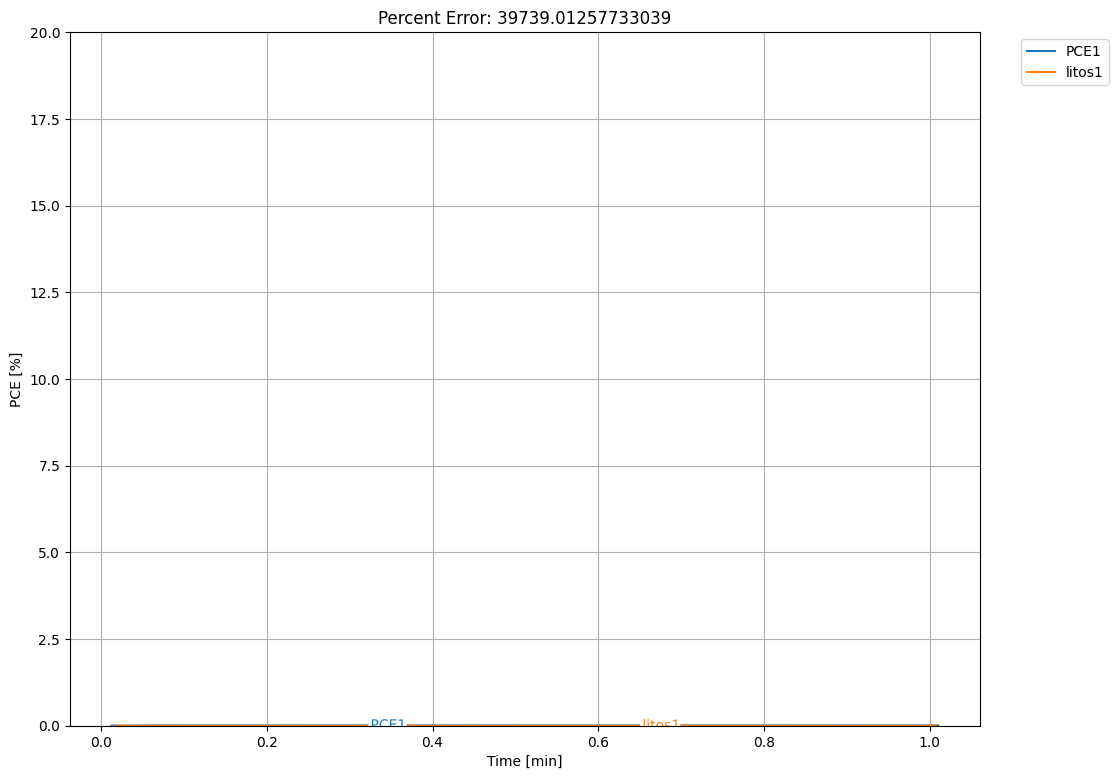

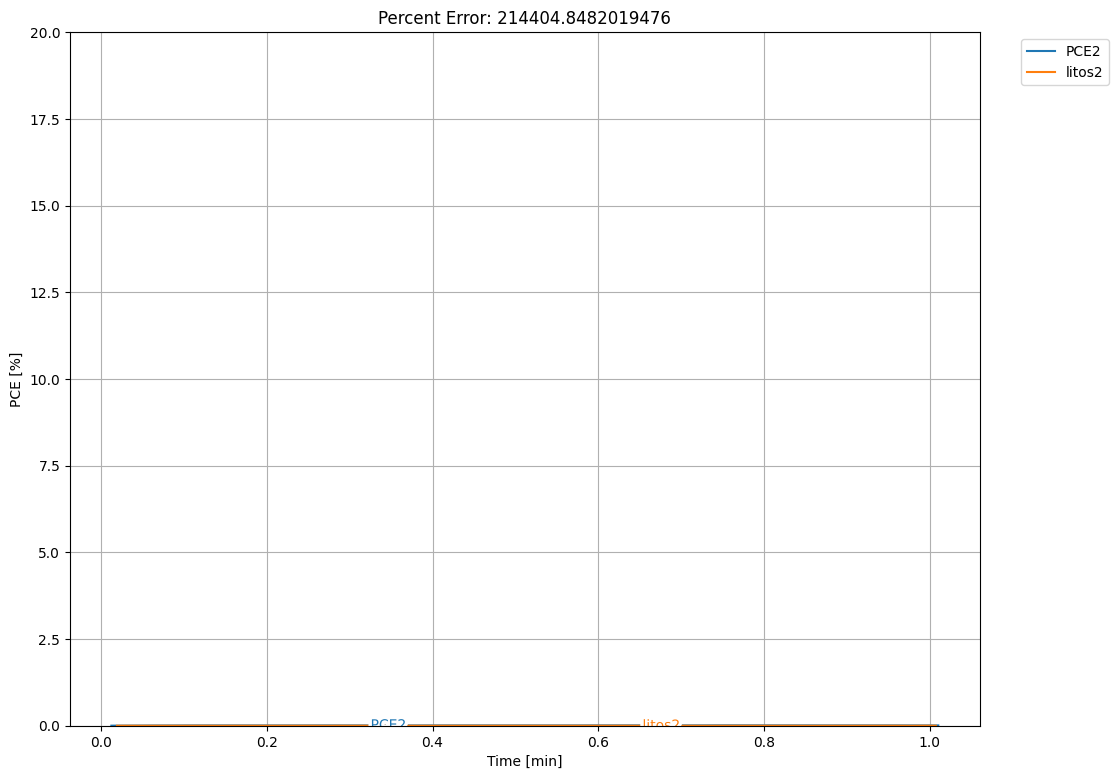

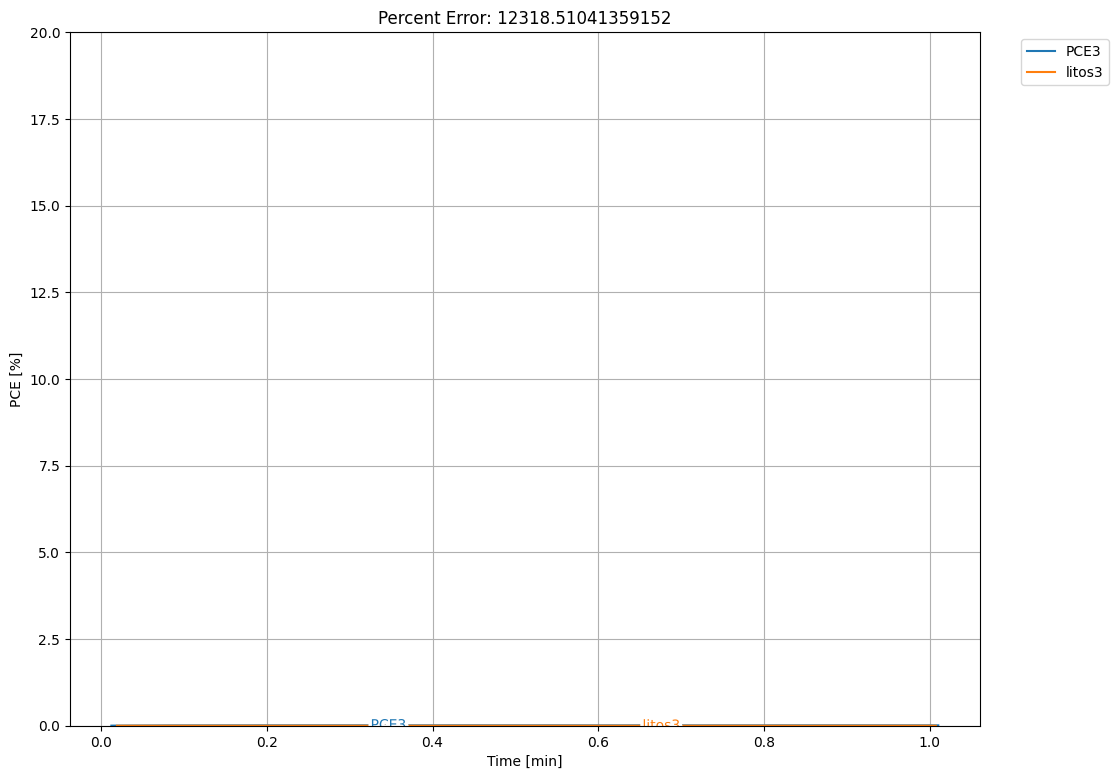

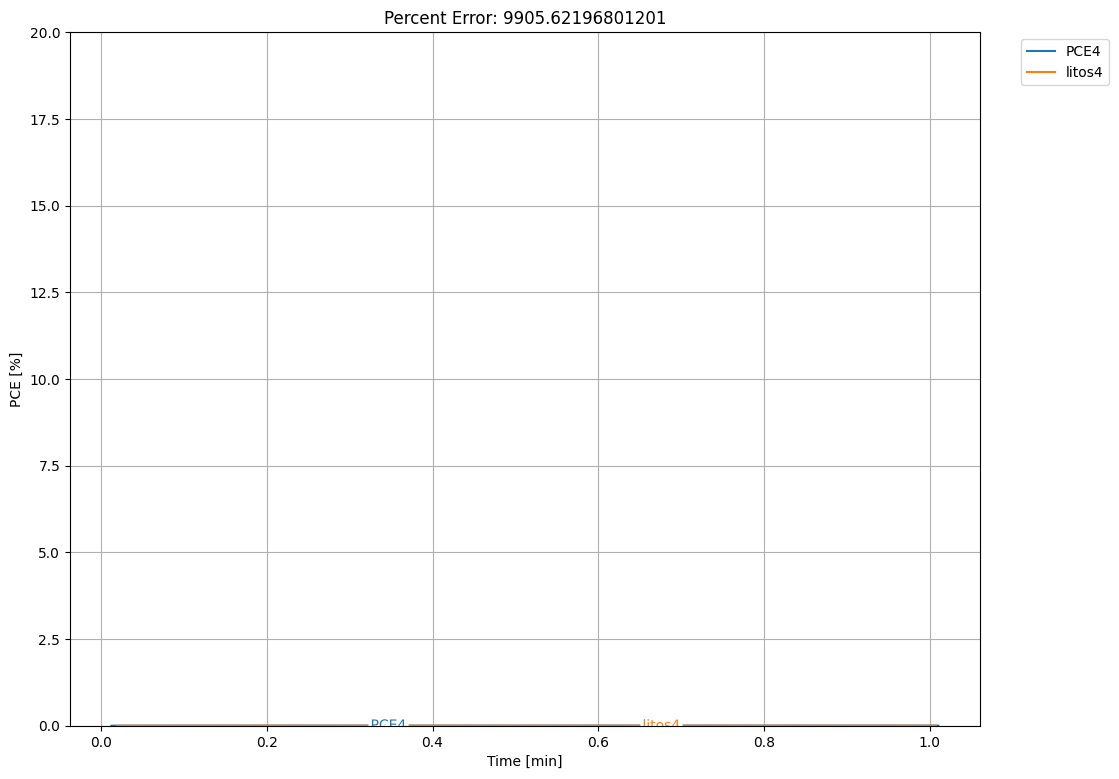

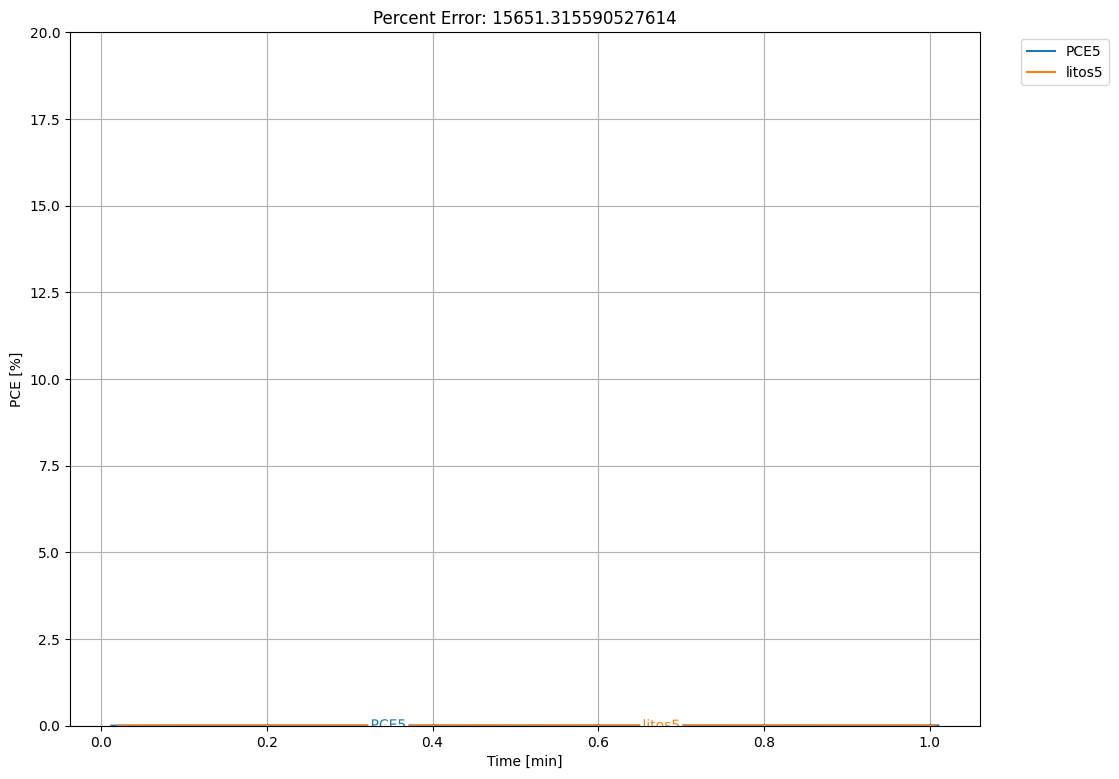

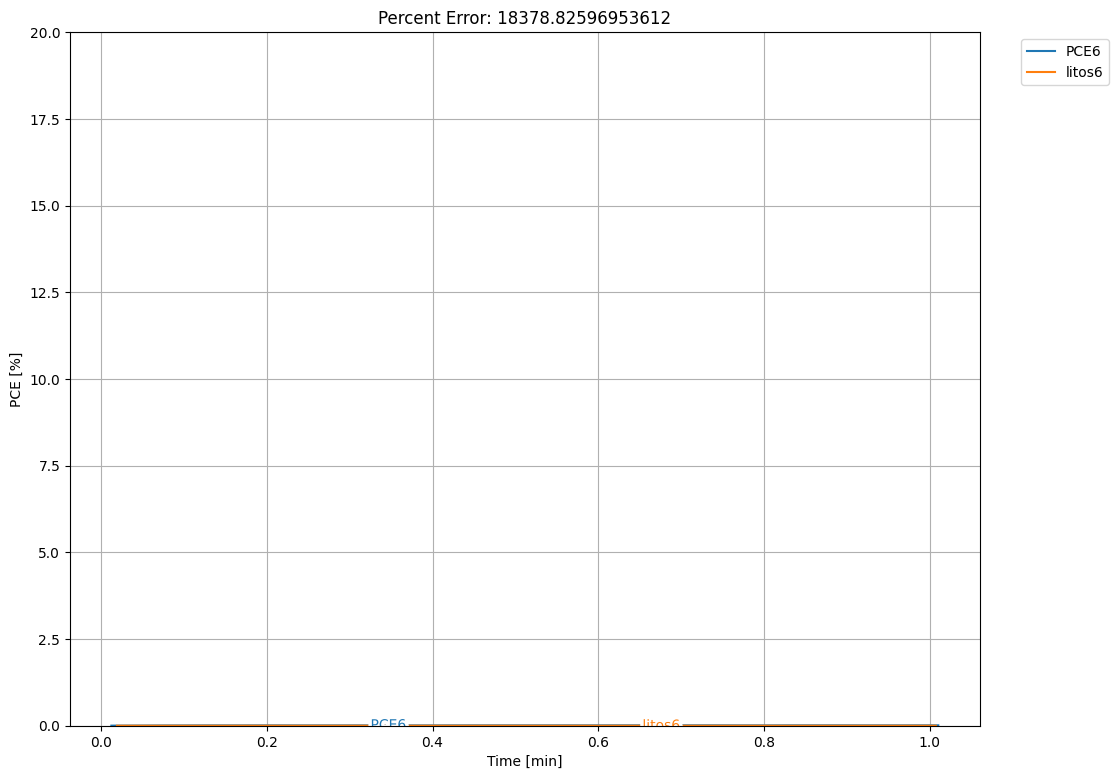

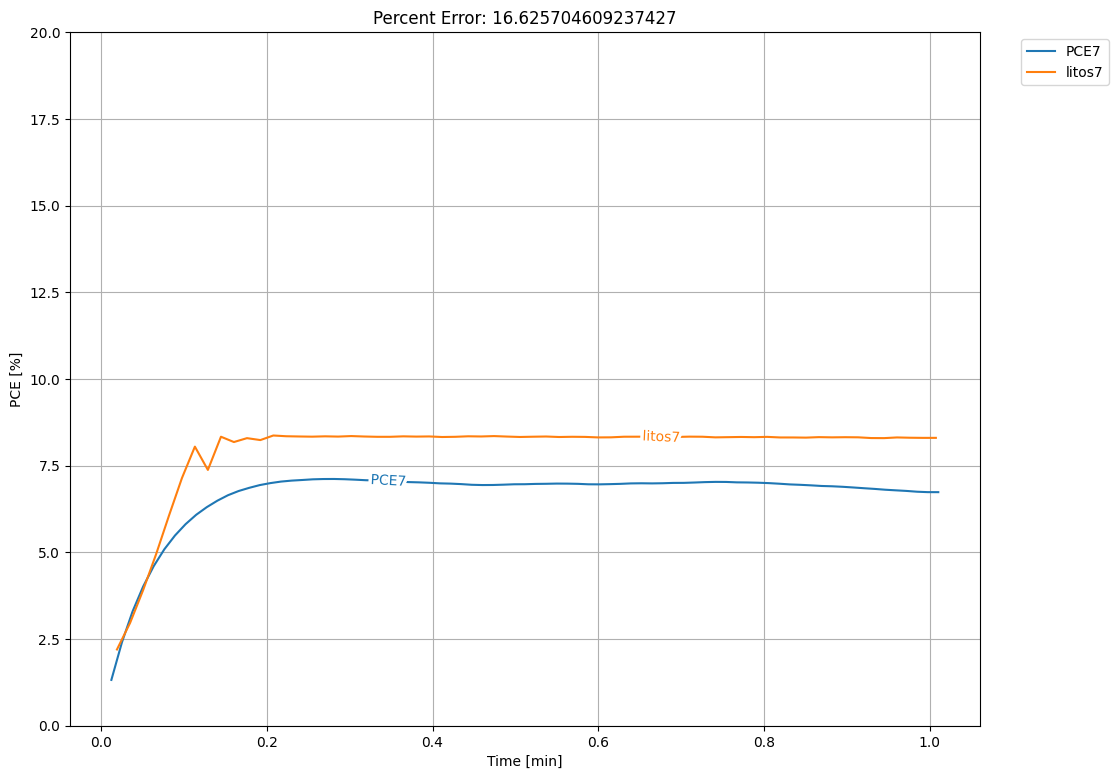

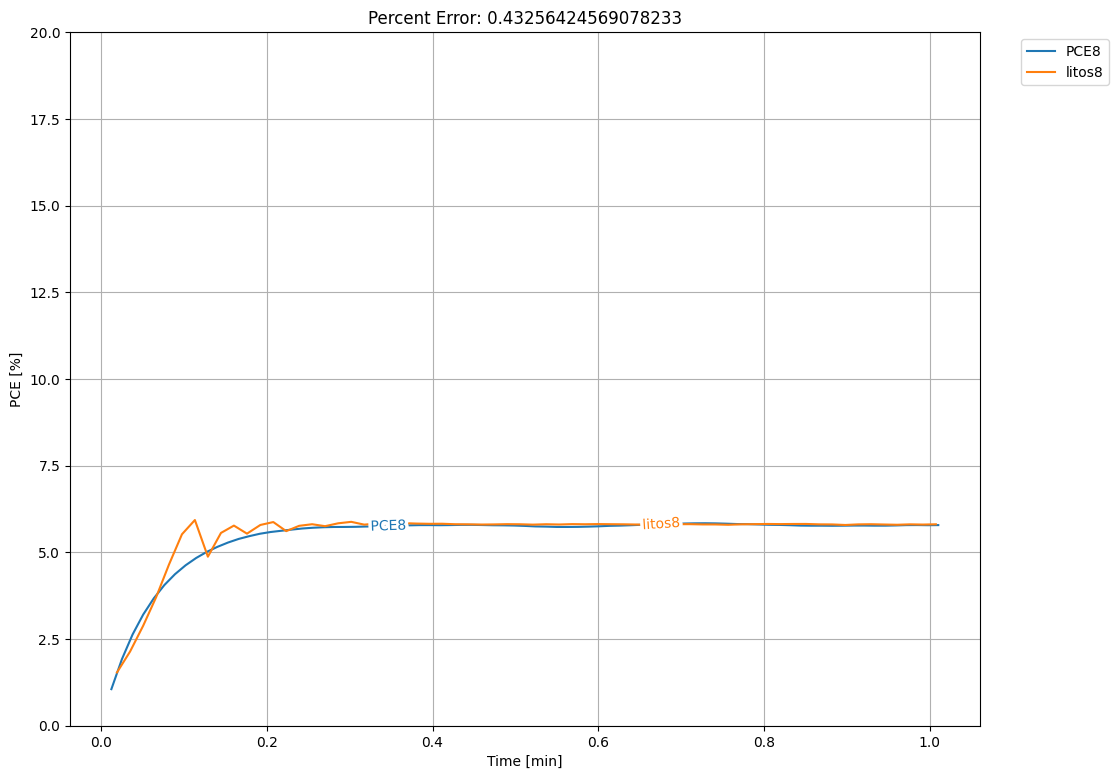

In [ ]:
errors = []
for i in range(8):
	plt.figure(figsize=plot_size)
	plt.ylim(bottom = -0, top = max_pce)
	plt.xlabel('Time [min]')
	plt.grid()

	plt.ylabel('PCE [%]')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)
	percent_error = float("inf")

	lineName = "PCE" + str(i + 1)
	if ss_file_path:
		plt.plot(time,data[:,i], label = lineName)
	if litos_time:
		plt.plot(litos_time[i], litos_pce[i], label = "litos" + str(i+1))
	if ss_file_path and litos_time:
		second_half_litos = litos_pce[i][len(litos_pce[i]) // 2:]
		average_second_half_litos = np.mean(second_half_litos)

		second_half = data[:,i][len(data[:,i]) // 2:]
		average_second_half = np.mean(second_half)

		percent_error = abs(average_second_half - average_second_half_litos) / abs(average_second_half_litos) * 100

	labelLines(plt.gca().get_lines(), zorder=2.5)
	plt.title("Percent Error: "+ str(percent_error))
	plt.legend(bbox_to_anchor=(1.15, 1))
for idx, i in enumerate(errors):
	print(idx+1, i)

In [ ]:

litos_directory = ""
litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\Mar-4-2025 4 device test\2025-03-04-- Litos New PCB 4 Device comparison\devices\device_4"

all_files = []

if litos_directory != "":
	for root, dirs, files in os.walk(litos_directory):
		for file in files:
			if file.endswith('.csv'):
				file_path = os.path.join(root, file)
				all_files.append(file_path)


litos_pce = []
litos_time = []

# Process each file



[6.518277]
[9.018055]
[5.157342]
[7.2e-05]
[8.05806]
[11.385308]
[5.2e-05]
[0.000312]


[11.980489822356686, 10.445676157590675, 11.818839911303405, 11.451331187836963, 11.981287720383836, 12.83199561297592, 12.493401470866804, 2.1745197361680322e-05]
[11.2520239349781, 8.896264341297515, 10.04067553057723, 9.59906903408312, 9.99953655116765, 2.6051065573770492e-05, 9.573134899719518, 1.1501721311475273e-06]
[11.980489822356686, 11.2520239349781]
[10.445676157590675, 8.896264341297515]
[11.818839911303405, 10.04067553057723]
[11.451331187836963, 9.59906903408312]
[11.981287720383836, 9.99953655116765]
[12.83199561297592, 2.6051065573770492e-05]
[12.493401470866804, 9.573134899719518]
[2.1745197361680322e-05, 1.1501721311475273e-06]
nan


C:\Users\achen\AppData\Local\Temp\ipykernel_23472\2928003868.py:112: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data != []:
c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\achen\miniforge3\envs\stabilitySetup\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


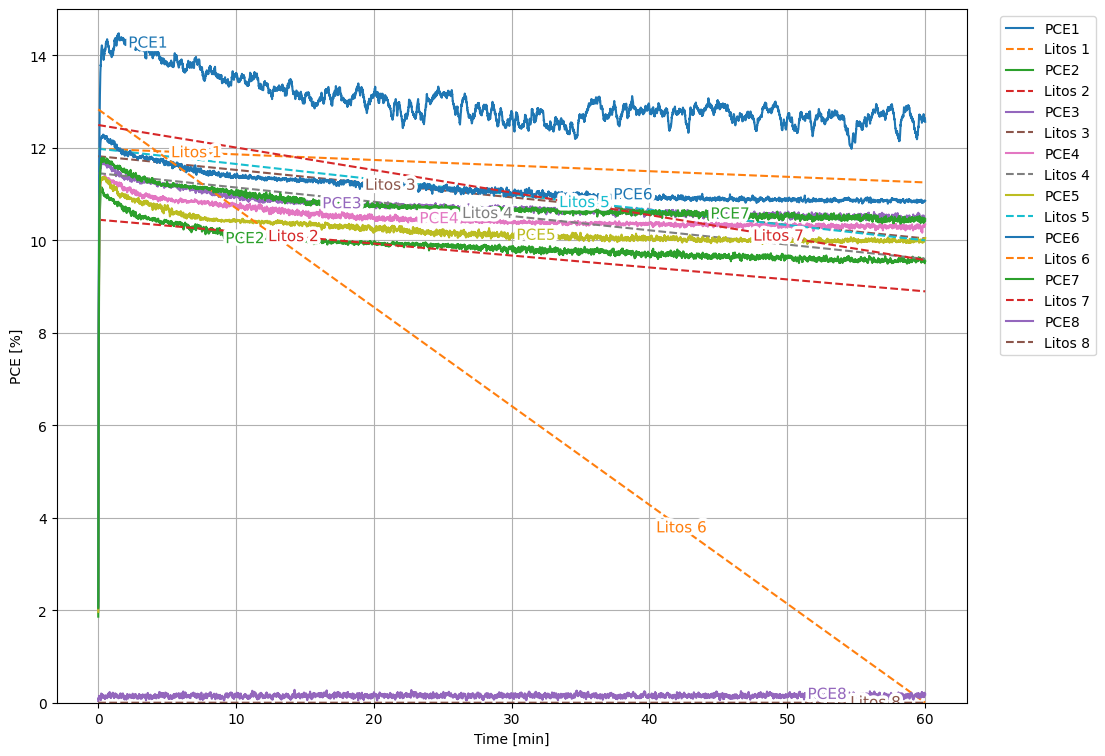

In [ ]:
#plot litos uneven length

litos_directory = ""
litos_directory = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --litos vs stability setup long test\nov6_2024 test 1\devices"



def process_files(litos_directory, all_files, pattern):
	all_files = []

	if litos_directory != "":
		for root, dirs, files in os.walk(litos_directory):
			for file in files:
				if file.endswith('.csv'):
					file_path = os.path.join(root, file)
					all_files.append(file_path)

	times = []
	pces = []
	for file_path in all_files:
		if pattern in file_path:
			try:
				data = np.genfromtxt(
					file_path,
					delimiter=',',
					comments='#',
					skip_header=0,
					encoding='cp1252'  # Specify the correct encoding
				)
				pce = (data[:, 1] * data[:, 2] / 1000) / (0.1 * 0.128) * 100
				times.append(data[:, 0])
				pces.append(pce)
			except Exception as e:
				print(f"Error processing {file_path}: {e}")

	pces = pces[::-1]
	return times, pces

def calculate_second_half_averages(pces):
	averages = []
	for pce in pces[:8]:  # Limit to first 8 files, as per the original code
		second_half = pce[len(pce) // 2:]
		averages.append(np.mean(second_half))
	return averages

# Process files for each pattern
litos_time1, litos_pce1 = process_files(litos_directory, all_files, "_3_0")
litos_time2, litos_pce2 = process_files(litos_directory, all_files, "_7_0")

# Calculate averages for each pattern
litos_beginning_avg = calculate_second_half_averages(litos_pce1)
litos_ending_avg = calculate_second_half_averages(litos_pce2)

print(litos_beginning_avg)
print(litos_ending_avg)


data = []

ss_file_path = ""
ss_file_path = r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --litos vs stability setup long test\Nov-06-2024 13_50_53\Nov-06-2024 13_50_53ID2PnO.csv"
if ss_file_path != "":
	arr = np.loadtxt(ss_file_path,
						delimiter=",",
						dtype=str)


	headers = arr[6,:]
	header_dict = {value: index for index, value in enumerate(headers)}
	pce_indicies = [header_dict[value] for value in header_dict if "PCE" in value]
	arr = arr[7:, :]

	time = np.array(arr[:,header_dict["Time"]]).astype('float')
	time/=60
	pce_list = np.array(arr)
	pce_list = pce_list[:, pce_indicies]
	# pce_list = pce_list[:,0:-1]
	for i in range(len(pce_list)):
		pce_list[i] = [float(j) if j != " ovf" else 0.0 for j in pce_list[i]]
		pce_list[i] = [float(j) if j != "nan" else 0.0 for j in pce_list[i]]

	pce_list = pce_list.astype(float)

	data = pce_list #np.array(data).T
	# data *= 2.048 # comment line if not using mask

# min_time = min(time)*0.99
# max_time = max(time)*1.01
plot_size = (12,8)
min_pce = 0
max_pce = 15

plt.figure(figsize=plot_size)
# plt.xlim(min_time,max_time)
plt.ylim(bottom = min_pce, top = max_pce)
plt.xlabel('Time [min]')
plt.grid()

plt.ylabel('PCE [%]')
plt.subplots_adjust(left=0.086,
					bottom=0.06,
					right=0.844,
					top=0.927,
					wspace=0.2,
					hspace=0.2)

errors = []

for i in range(8):
	lineName = "PCE" + str(i + 1)
	# print(np.array(pce_list[i]))
	if data != []:
		plt.plot(time,data[:,i], label = lineName)
	if i < len(litos_beginning_avg) and i < len(litos_ending_avg):
		# Calculate straight line
		y_values = [
			litos_beginning_avg[i],
			litos_ending_avg[i]
		]
		print(y_values)
		x_values = [time[0], time[-1]]
		plt.plot(x_values, y_values, linestyle="--", label=f"Litos {i + 1}")

print(np.mean(errors))

lines = plt.gca().get_lines()
x_min, x_max = plt.xlim()
num_lines = len(lines)
xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
bold_font = FontProperties(weight='medium')
labelLines(
	lines,
	xvals=xvals,
	zorder=2.5,
	align=False,
	fontsize=11,
	fontproperties=bold_font
)
plt.legend(bbox_to_anchor=(1.15, 1))


5.702184461254767
1 11.712155552192428
2 7.597715714838777
3 4.563543000435888
4 7.159613916019965
5 0.08828099545398294
6 41636914.98210712
7 9.101768679525222
8 14331051.566674741


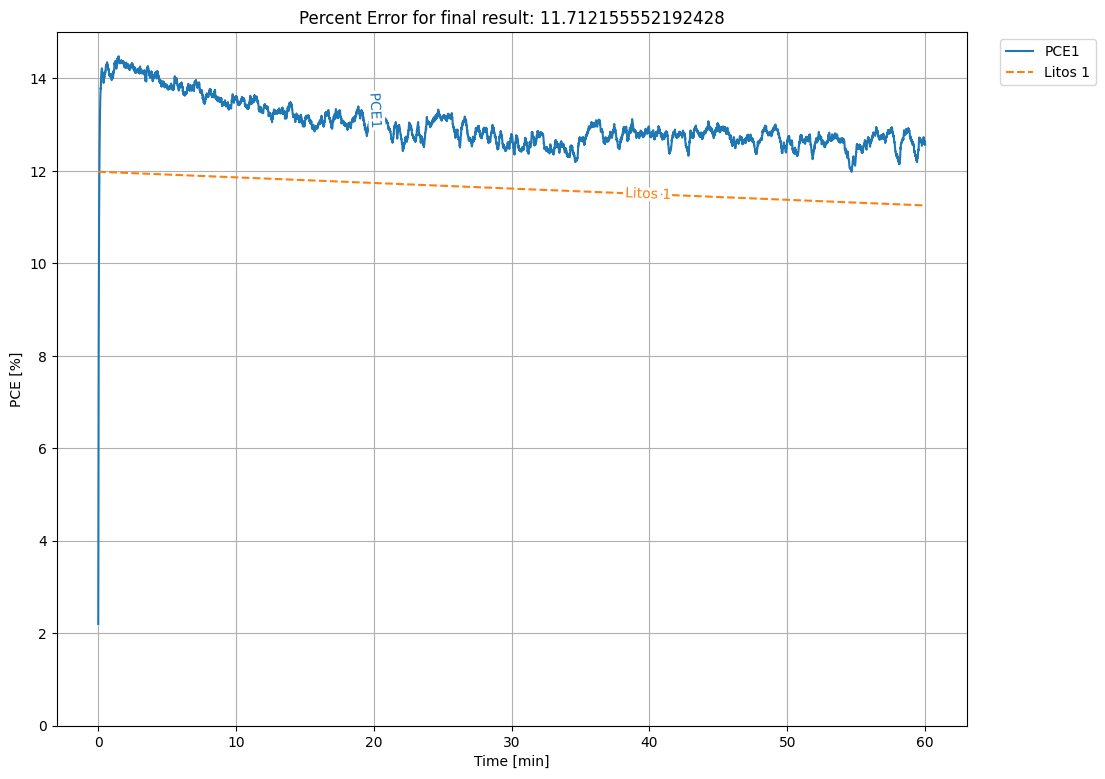

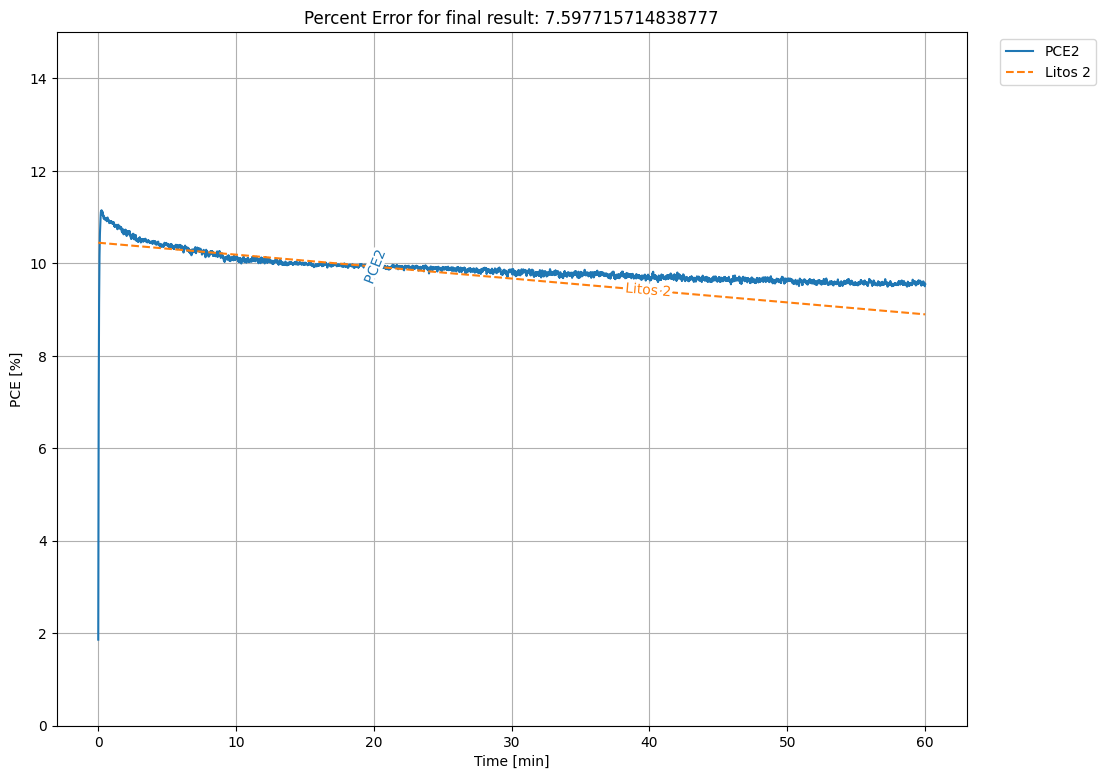

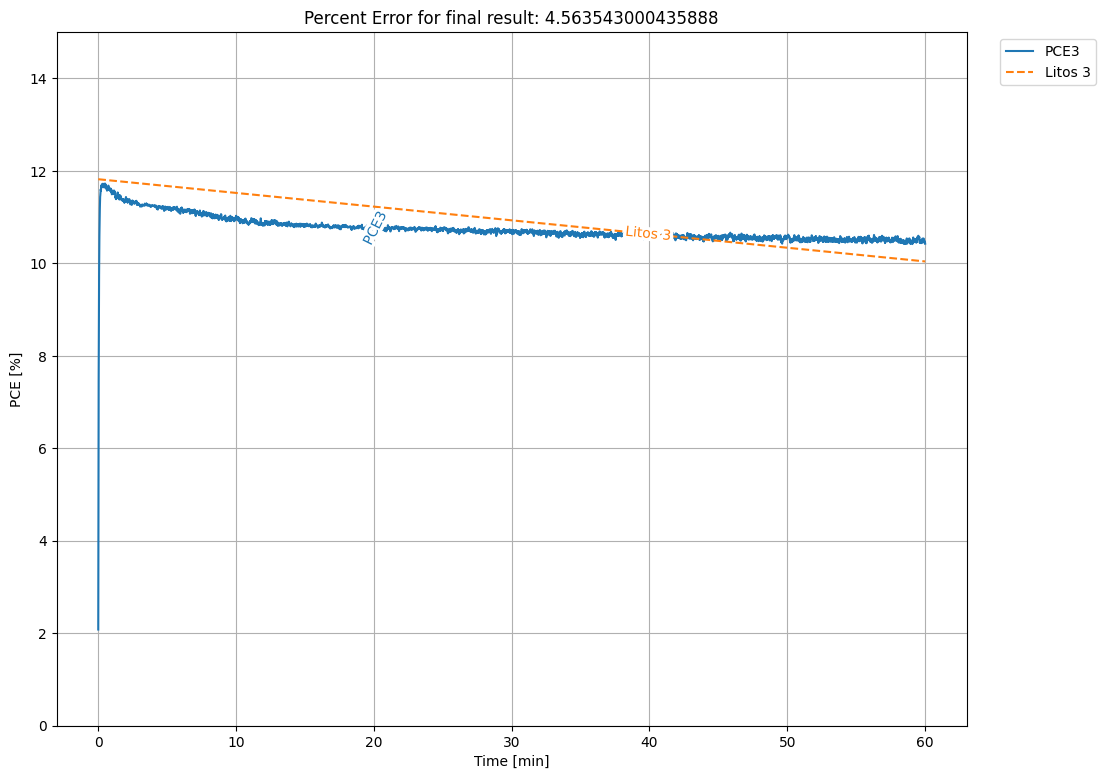

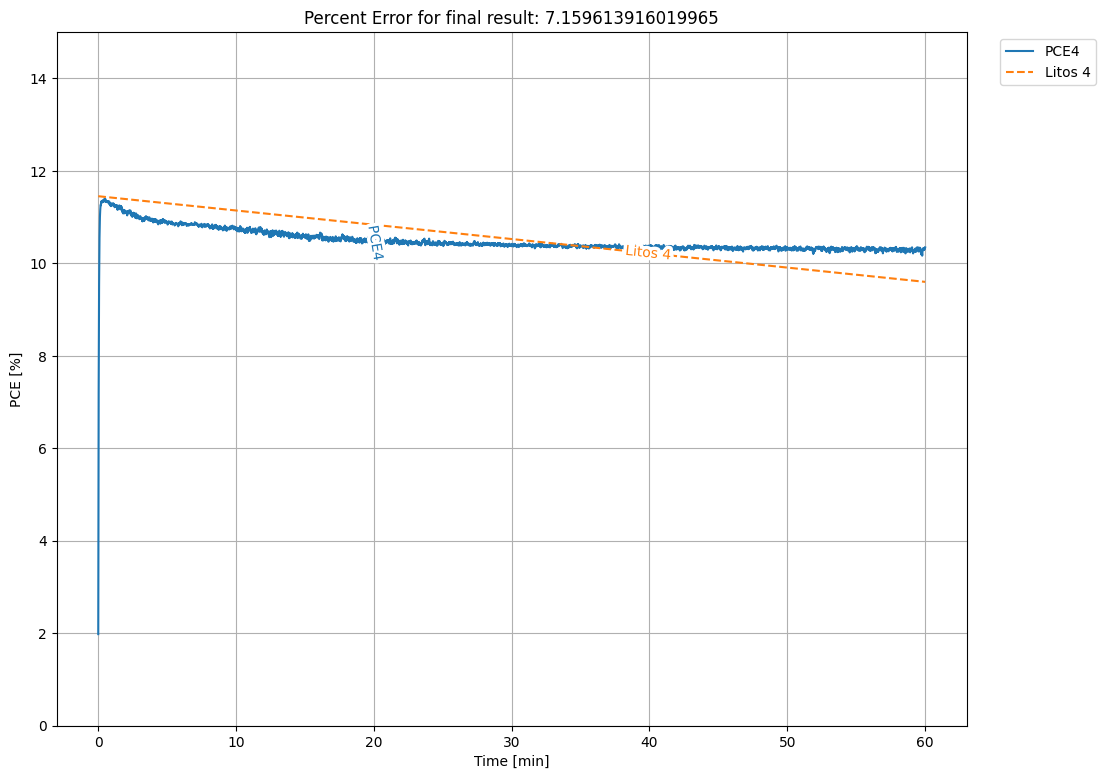

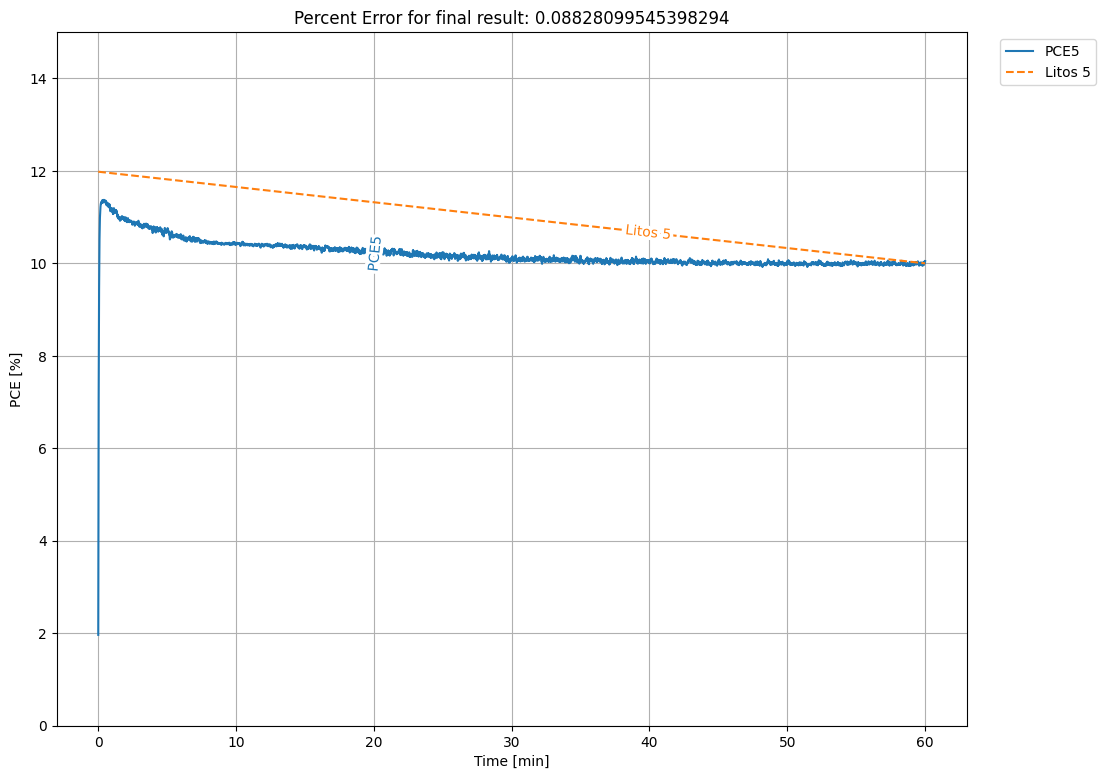

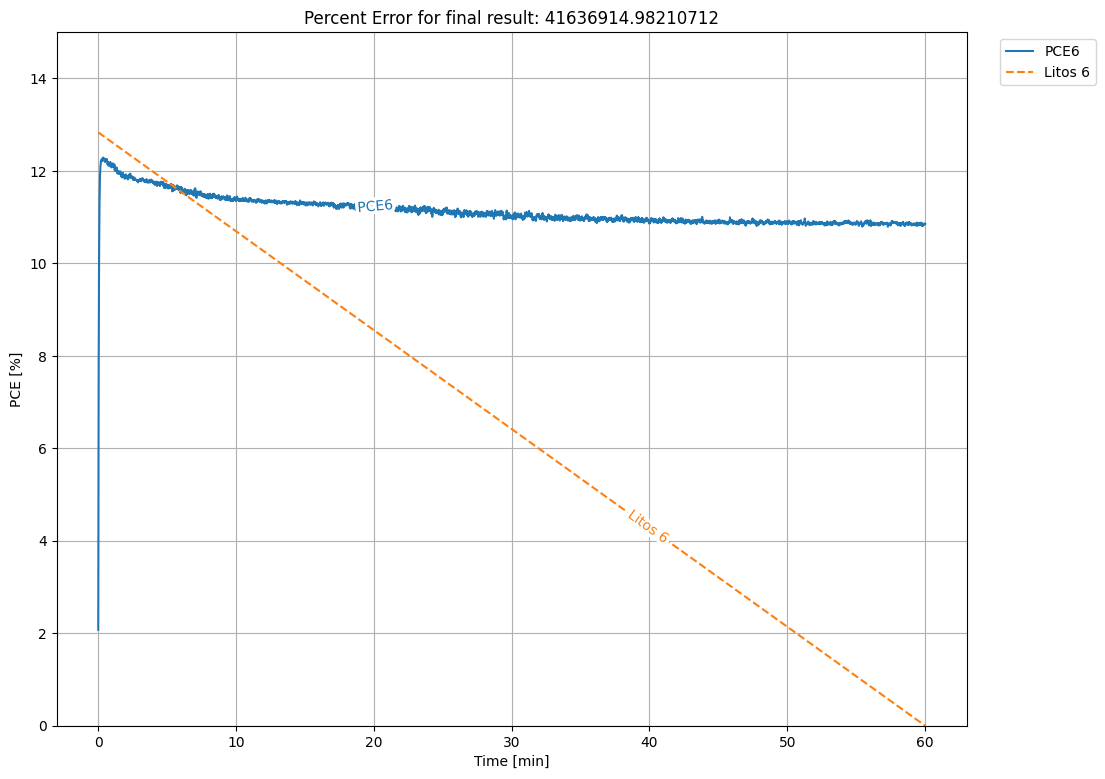

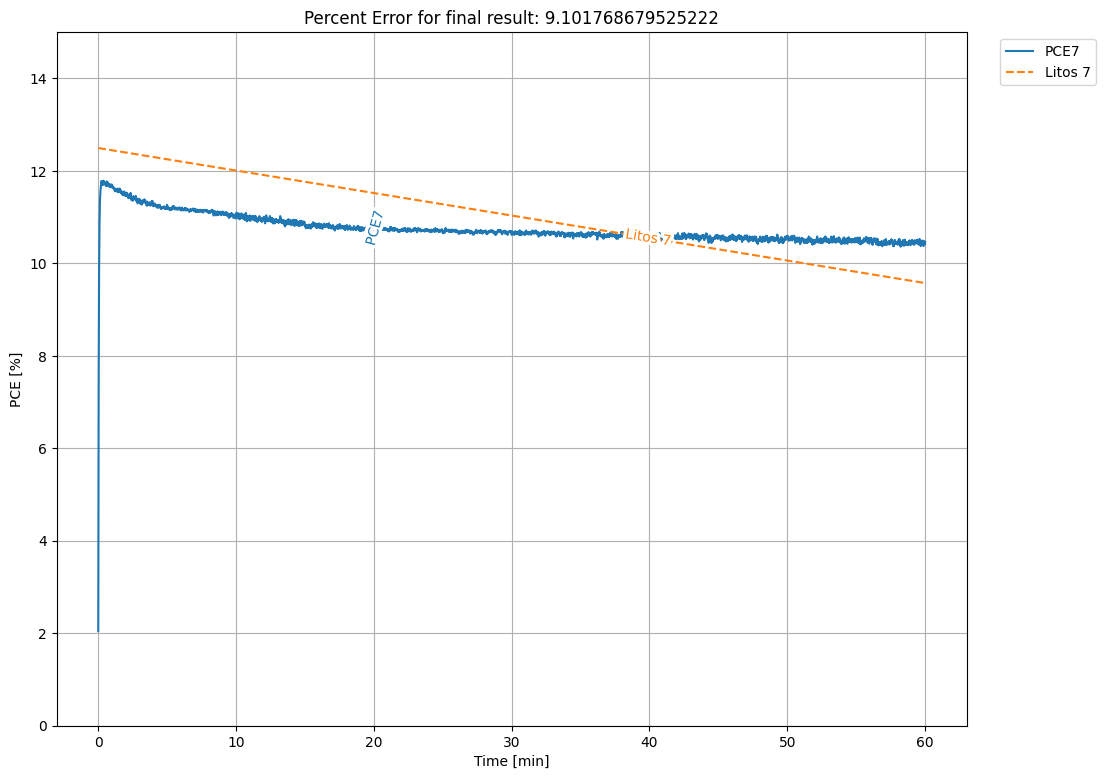

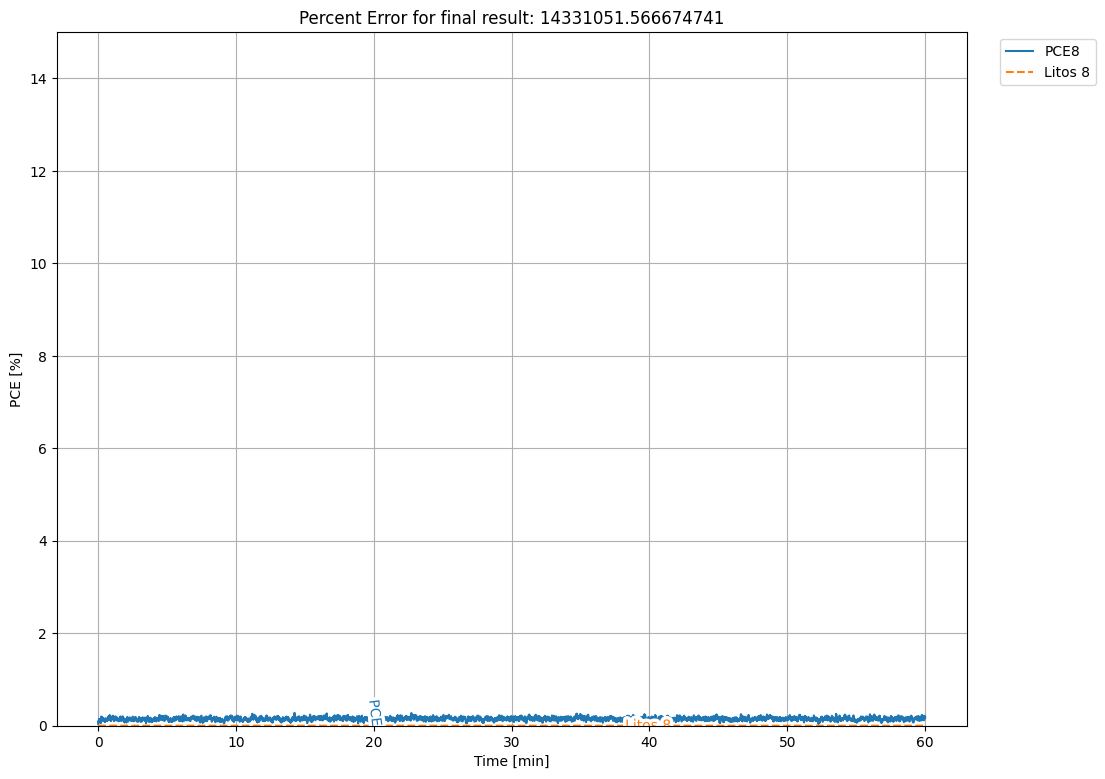

In [ ]:
errors = []
for i in range(8):
	plt.figure(figsize=plot_size)
	plt.ylim(bottom = -0, top = max_pce)
	plt.xlabel('Time [min]')
	plt.grid()

	plt.ylabel('PCE [%]')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)


	lineName = "PCE" + str(i + 1)
	# print(np.array(pce_list[i]))
	plt.plot(time,data[:,i], label = lineName)
	if i < len(litos_beginning_avg) and i < len(litos_ending_avg):
		# Calculate straight line
		y_values = [
			litos_beginning_avg[i],
			litos_ending_avg[i]
		]
		x_values = [time[0], time[-1]]
		plt.plot(x_values, y_values, linestyle="--", label=f"Litos {i + 1}")

	last_portion = data[:,i][99*len(data[:,i]) // 100:]
	average_last_ss = np.mean(last_portion)

	percent_error = abs(average_last_ss - litos_ending_avg[i]) / abs(litos_ending_avg[i]) * 100
	errors.append(percent_error)

	labelLines(plt.gca().get_lines(), zorder=2.5)
	plt.title("Percent Error for final result: "+ str(percent_error))
	plt.legend(bbox_to_anchor=(1.15, 1))


for idx, i in enumerate(errors):
	print(idx+1, i)

11.980489822356686
10.445676157590675
11.818839911303405
11.451331187836963
11.981287720383836
12.83199561297592
12.493401470866804
2.1745197361680322e-05
nan
11.2520239349781
8.896264341297515
10.04067553057723
9.59906903408312
9.99953655116765
2.6051065573770492e-05
9.573134899719518
1.1501721311475273e-06
nan


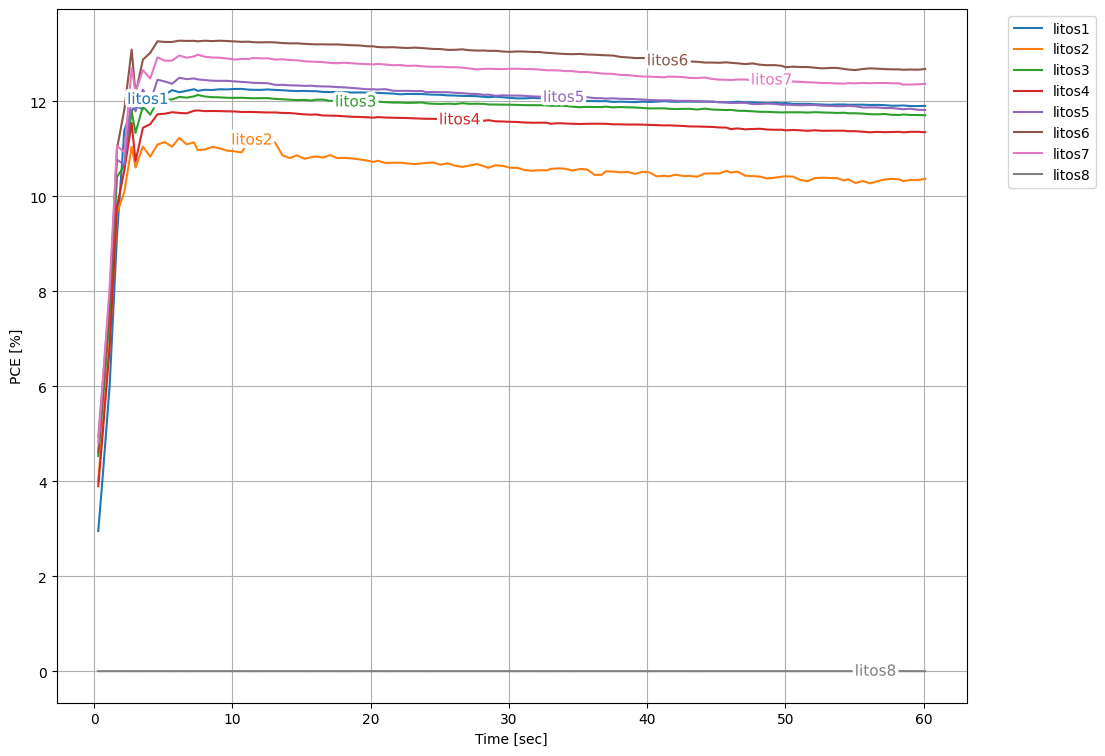

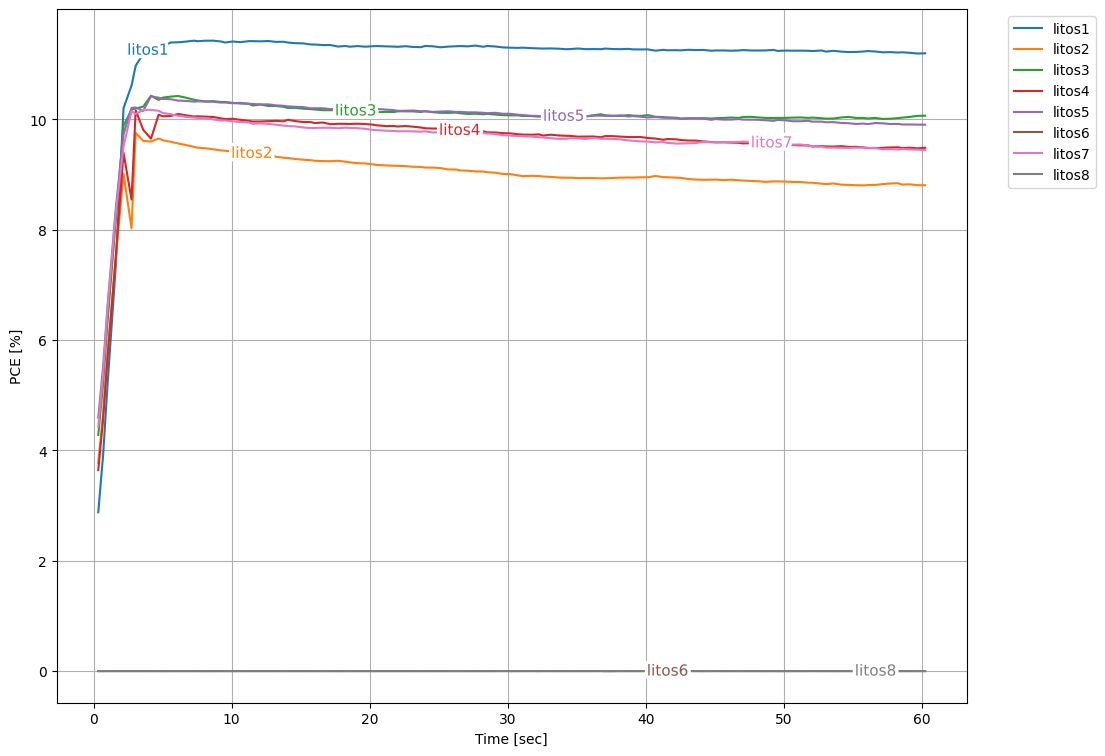

In [ ]:
def plot_litos_only(litos_directory, pattern):
	# litos_directory = ""

	all_files = []

	if litos_directory != "":
		for root, dirs, files in os.walk(litos_directory):
			for file in files:
				if file.endswith('.csv'):
					file_path = os.path.join(root, file)
					all_files.append(file_path)


	litos_pce = []
	litos_time = []

	# Process each file
	for file_path in all_files:
		if pattern in file_path:
			try:
				data = np.genfromtxt(
					file_path,
					delimiter=',',
					comments='#',
					skip_header=0,
					encoding='cp1252'  # Specify the correct encoding
				)
				pce = (data[:, 1] * data[:, 2] /1000) / (0.1*0.128)*100
				# data_with_pce= np.column_stack((data, pce))
				litos_time.append(data[:,0])
				litos_pce.append(pce)
			except Exception as e:
				print(f"Error processing {file_path}: {e}")

	litos_pce = litos_pce[::-1]
	litos_time = litos_time[::-1]


	plt.figure(figsize=plot_size)
	plt.xlabel('Time [sec]')
	plt.grid()

	plt.ylabel('PCE [%]')
	plt.subplots_adjust(left=0.086,
						bottom=0.06,
						right=0.844,
						top=0.927,
						wspace=0.2,
						hspace=0.2)

	errors = []

	for i in range(8):
		if litos_time:
			plt.plot(litos_time[i], litos_pce[i], label = "litos" + str(i+1))
			second_half_litos = litos_pce[i][len(litos_pce[i]) // 2:]
			average_second_half_litos = np.mean(second_half_litos)
			print(average_second_half_litos)

	print(np.mean(errors))

	lines = plt.gca().get_lines()
	x_min, x_max = plt.xlim()
	num_lines = len(lines)
	xvals = np.linspace(x_min + 0.1 * (x_max - x_min), x_max - 0.1 * (x_max - x_min), num_lines)
	bold_font = FontProperties(weight='medium')
	labelLines(
		lines,
		xvals=xvals,
		zorder=2.5,
		align=False,
		fontsize=11,
		fontproperties=bold_font
	)
	plt.legend(bbox_to_anchor=(1.15, 1))
plot_litos_only(r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --litos vs stability setup long test\nov6_2024 test 1\devices", "_3_0")
plot_litos_only(r"C:\Users\achen\Dropbox\code\Stability-Setup\data\2024-11-06 --litos vs stability setup long test\nov6_2024 test 1\devices", "_7_0")